In [ ]:
from torchvision import models # здесь лежат предобученные сетки

import argparse
from types import SimpleNamespace # простой класс, где можно прописать параметры
import json

# Для визуализации
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy

# Библиотеки Pytorch
import torch 
import torchvision # здесь лежит mnist, cifar и много других датасетов и трансформаций для картинок
import torch.nn as nn # здесь лежат все слои
import torch.utils.data as data # работа с загрузчиком данных
import torchvision.transforms as transforms
import torchvision.datasets as dsets #работа с классом Датасет
from torch.autograd import Variable # для автоматического дифференциатора

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Пример использования предобученной модели

In [ ]:
 # загружаем готовую предобученную сеть, переключаем в режим проверки

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 161MB/s]


Загружаем разметку между названием класса и соответствующему ему числу

In [ ]:
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json # подгружаем одной командой (из документации ImageNet)
class_idx = json.load(open("imagenet_class_index.json"))
idx2label = np.array([class_idx[str(k)][1] for k in range(len(class_idx))])

--2019-11-17 13:37:58--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.142
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K   191KB/s    in 0.2s    

2019-11-17 13:37:59 (191 KB/s) - ‘imagenet_class_index.json’ saved [35363/35363]



vgg16 была обучена на датасете imagenet, где входящие значения были нормализованы следующим образом:

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.485, 0.456, 0.406), 
                                                                            std=(0.229, 0.224, 0.225))])

Посмотрим, что умеет эта сетка

In [ ]:
# Загружаем картинку

# Применяем нормализацию


#Пропустим через софтмакс выход с последнего слоя предобученной сети, через которую мы прогнали наше изображение
                                                       # добавляем дополнительное измерение,
                                                       # чтобы получить тензор формата [размер batch, ширина, высота, количество каналов]
                                                       # и вытягиваем в вектор
                                                       
sortedOuputs = torch.argsort(probas, descending=True) # в соответствие с каждой вероятностью подбираем класс

# Вывод 5 наиболее вероятных классов
for i in range(5):
    print("Метка класса: {:s} - Вероятность: {:4f}".format(
        idx2label[sortedOuputs[i]], probas[sortedOuputs[i]]))

torch.Size([3, 300, 300])
Метка класса: lorikeet - Вероятность: 0.505242
Метка класса: bee_eater - Вероятность: 0.186730
Метка класса: macaw - Вероятность: 0.113632
Метка класса: toucan - Вероятность: 0.033876
Метка класса: fig - Вероятность: 0.015141


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


## Настройка (Fine-tuning) предобученной модели

Загрузим выбранный датасет

In [ ]:
batchSize = ?
numClasses = ?
numEpochs = ?
learningRate = ?

trainDataset = 

testDataset = 

trainLoader = 

testLoader = 

Files already downloaded and verified


In [ ]:
iterator = iter(trainLoader)    
samples, labels = iterator.next()

In [ ]:
# Узнаем, с каким размером мы работаем, чтоб ввести правильные параметры слоя
print(?)

In [ ]:
# Заменим последний слой для настройки под наш датасет


In [ ]:
# Функция ошибки
# Оптимизатор

# Обучим наш последний слой

# Сохраним полученные веса


In [ ]:
# включаем режим проверки

# проверим результат сети

In [ ]:
# посмотрите на размер картинки

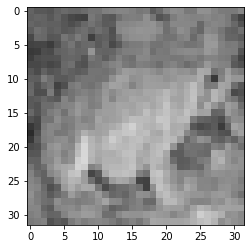

Предсказание: лягушка


In [ ]:
im = images[5,1].numpy() # Превращаем первую картинку в массив
im = 255*np.reshape(im,(?,?)) # Приводим к формату RGB
x = Image.fromarray(im.astype(np.uint8)).convert('RGBA') #Данные массива должны быть универсальной кодировки и приводим к формату изображения

plt.imshow(x)
plt.show()

# Предсказание


# Generative Adversive Network
На базе предложенного алгоритма [A Neural Algorithm of Artistic Style](https://arxiv.org/pdf/1508.06576.pdf)

[Здесь](https://poloclub.github.io/ganlab/) вы можете ознакомиться с работой GAN наглядно.

In [ ]:
config = SimpleNamespace() # Создаем базовый класс пространства имен
config.content = '/content/drive/My Drive/Занятия/Майский курс/Занятие #24-25. Pytorch. Часть #1,2/example/Indian-Ring-Necked-Parakeet-300x300.jpg' # наша основная картинка
config.style = '/content/drive/My Drive/Занятия/Майский курс/Занятие #24-25. Pytorch. Часть #1,2/thumb-1920-247154.jpg' # наша стилизованная картинка
config.maxSize = 400 # максимально допустимый размер изображения
config.totalStep = 2000 # общее количество шагов за эпоху
config.step = 10 # шаг
config.sampleStep = 200 # шаг для сохранения образца
config.styleWeight = 100 #вес на стиль
config.lr = .003 

In [ ]:
# Проверка, если GPU включен

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class PretrainedNet(nn.Module):
    def __init__(self):
        # Инициализируем нашу модель
        super(PretrainedNet, self).__init__()
        self.select = [0, 5, 7, 23, 9] # те слои, через которые мы будем пропускать свое изображение
        self.pretrainedNet = models.vgg19(pretrained=True).to(device) # подгружаем предобученную сетку
        
    def forward(self, x):
        features = [] # Извлекаем по индексам, которые мы прописали выше, feature map из сетки
        output = x
        for layerIndex in range(len(self.pretrainedNet.features)):
          output = self.pretrainedNet.features[layerIndex](output)
          if layerIndex in self.select:
            features.append(output)
        return features

In [ ]:
def load_image(image_path, transform=None, maxSize=None, shape=None):
    # Загружаем изображение
    image = Image.open(image_path)
    
    # Если указан максимальный размер, то меняем размер нашего изображения
    if maxSize:
        scale = maxSize / max(image.size)
        size = np.array(image.size) * scale
        image = image.resize(size.astype(int), Image.ANTIALIAS)
        
    # Если указана форма изображением, меняем форму
    if shape:
        image = image.resize(shape, Image.LANCZOS)

    # Если указаны методы трансформирования, то применяем его
    if transform:
        image = transform(image).unsqueeze(0)
    
    return image.to(device)

In [ ]:
# Методы трансформирования изображения
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.485, 0.456, 0.406), 
                                                                            std=(0.229, 0.224, 0.225))])

In [ ]:
# Загружаем оригинал и стиль для картинок, применив нужные методы
content = load_image(config.content, transform, maxSize=config.maxSize)
style = load_image(config.style, transform, shape=[content.size(2), content.size(3)])


In [ ]:
# Создаем место под тензор для конечной картинки, указываем, что дифференцируем 
target = content.clone().requires_grad_(True)

In [ ]:
model = PretrainedNet().eval() # для использования весов предобученной сетки переводим ее в режим eval
optimizer = torch.optim.Adam([target], lr=0.1)
contentCriteria = nn.MSELoss()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:11<00:00, 50.9MB/s]


In [ ]:
for step in range(config.totalStep):
    # Для каждого из изображений извлекаем feature map
    targetFeatures = model.forward(target)
    contentFeatures = model.forward(content) 
    styleFeatures = model.forward(style)
    
    styleLoss = 0
    contentLoss = 0

    for f1, f2, f3 in zip(targetFeatures, contentFeatures, styleFeatures):
        # Вычисляем потери для оригинала и конечной картинки
        contentLoss += contentCriteria(f1, f2)
        #print(contentLoss)

        # Меняем форму сверточных feature maps. Приводим к формату (количество каналов, ширина*высота)
        _, c, h, w = f1.size() # пропускаем batch
        f1 = f1.reshape(c, h*w).to(device) 
        f3 = f3.reshape(c, h*w).to(device)

        # Находим матрицу Грамма для конечной и стиля
        f1 = torch.mm(f1, f1.t()) #
        f3 = torch.mm(f3, f3.t())

        # Потери для стиля и конечной картинки
        betta = len(targetFeatures)*len(contentFeatures)**2
        styleLoss += (1/4*betta)*contentCriteria(f1,f3) 
    # Прописываем конечную функцию потерь 
    loss = styleLoss + betta*contentLoss
    #print(betta)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (step+1) % config.step == 0:
        print ('Шаг [{}/{}], Ошибка для оригинала: {:.4f}, Ошибка для стиля: {:.4f}' 
               .format(step+1, config.totalStep, contentLoss.item(), styleLoss.item()))

    if (step+1) % config.sampleStep == 0: # сохраняем нашу картинку
        denorm = transforms.Normalize((-2.12, -2.04, -1.80), (4.37, 4.46, 4.44)) # обратное трансформирование
        img = target.clone().squeeze() # создаем место под тензор
        img = denorm(img).clamp_(0, 1) # оставить значения, попадающие в диапазон между 0,1
        torchvision.utils.save_image(img, 'output-{}.png'.format(step+1))